**Question 1**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code pour la question 1.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Notre fonction prend donc en argument la composition du milieu sous forme de liste de tuple. Pour chaque atome différent contenu dans le milieu, une liste contenant le numéro atomique ainsi que la fraction par poid obtenu à l'aide du site web https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119 doit être ajouté à la liste composition_atomique. Aussi, la masse volumique du milieu doit être donnée en argument. L'argument composition a donc la forme suivante:

*composition_atomique = [(Z_1, frac_by_weight_1), (Z_2, frac_by_weight_2), ...,  (Z_n, frac_by_weight_n)]*

La fonction ci-dessous nous retourne donc le nombre d'électrons par mètre cube selon le milieu d'intérêt.

In [5]:
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique

Ci-dessous, nous allons calculer la densité électronique de l'eau liquide. En effet, sachant que la densité de l'eau liquide est de 1 g/cm^3 et que la fraction du poids relié à l'hydrogène (Z=1) est de 0,111894 et celle relié à l'oxygène (Z=8) est de 0,888106, nous pouvons calculer la densité électronique de l'eau liquide à l'aide de la fonction _densité_électronique_ en lui donnant en argument les données précédentes.

In [6]:
eau = [(1, 0.111894), (8, 0.888106)]
rho_eau = 997
densité_électronique_eau = densité_électronique(eau, rho_eau)
print('''La densité électronique de l'eau est de '''+str(densité_électronique_eau)+''' électrons par m^3''')

La densité électronique de l'eau est de 3.333553995583265e+29 électrons par m^3


Et nous répétons ensuite le processus avec l'os solide en donnant en argument à la fonction *densité_électronique* les tuples de la composition atomique du milieu ainsi que la masse volumique du milieu.

In [7]:
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
rho_os = 1850
densité_électronique_os = densité_électronique(os, rho_os)
print('''La densité électronique d'un os solide est de '''+str(densité_électronique_os)+''' électrons par m^3''')

La densité électronique d'un os solide est de 5.9065218554448814e+29 électrons par m^3


Voici ci-dessous, les énergies moyenne d'excitation de nos deux milieux en eV obtenues encore une fois sur le site web suivant: https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119

In [8]:
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
print('''L'énergie moyenne d'excitation de l'eau liquide est de 75eV ou '''+str(Énergie_moyenne_excitation_eau)+'J')
print('''L'énergie moyenne d'excitation de l'os solide est de 91.9eV ou '''+str(Énergie_moyenne_excitation_os)+'J')

L'énergie moyenne d'excitation de l'eau liquide est de 75eV ou 1.2015e-17J
L'énergie moyenne d'excitation de l'os solide est de 91.9eV ou 1.4722380000000002e-17J


Grâce à toutes ces données, il nous est maintenant possible de calculer le pouvoir d'arrêt collisionnel en fonction de l'énergie initial du proton pour nos deux milieux. On calcul donc $S_{col}$ pour les deux milieux en simplifiant la notation de la manière suivante (définitions provenant du document de l'énoncé de ce travail):

\begin{gather*}
    S_{col}(T)=2\pi r_e^2m_ec^2n_e\frac{1}{\beta^2}\left[\ln(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2})-2\beta^2\right]
\end{gather*}

\begin{align*}
    T_e^{max}=&\frac{a(\gamma^2-1)}{b+\delta\gamma} & a=&2m_ec^2 & b=&1+(\frac{m_e}{m_p})^2 & \delta=&2\frac{m_e}{m_p}
\end{align*}

Il est aussi important de noter que toute les unités utilisées pour calculer les valeurs de $S_{col}$ sont en unités S.I ce qui nous retourne un pouvoir d'arrêt collisionnel en joules par mètre. Le calcul des valeurs de $S{col}$ se fait donc à partir d'un *array* numpy contenant les énergies initiales des protons (entre 3 et 250 MeV pour la protonthérapie). La cellule de code ci-dessous permet également de tracer les courbes du pouvoir d'arrêt collisionnel de ces protons en fonction de leur énergie initial dans les deux milieux d'intérêt.

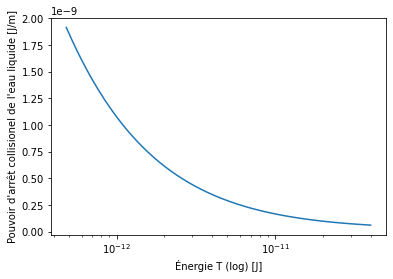

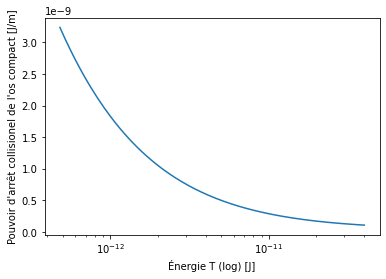

In [9]:
T = np.linspace(3,250,1000)
T = T*1.602e-13
T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
gamma = T/(m_p*c**2) + 1
Beta = np.sqrt((gamma**2-1)/gamma**2)
a = 2*m_e*c**2
b = 1 + (m_e/m_p)**2
delta = 2*m_e/m_p
T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
plt.plot(T, S_col_eau)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pouvoir d'arrêt collisionel de l'eau liquide [J/m]''')
plt.show()
plt.plot(T, S_col_os)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pouvoir d'arrêt collisionel de l'os compact [J/m]''')
plt.show()

**Question 2**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code pour la question 2.

In [10]:
import matplotlib.image as mpimg

En exécutant la cellule de code ci-dessous, on peut observer le pouvoir d'arrêt total, le pouvoir d'arrêt électronique (perte énergétique par Bremsstahlung) et le pouvoir d'arrêt nucléaire (intéraction avec les noyaux atomiques) d'un proton se propageant dans les deux milieux d'intérêts.

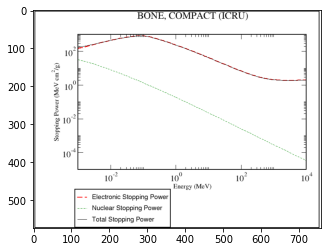

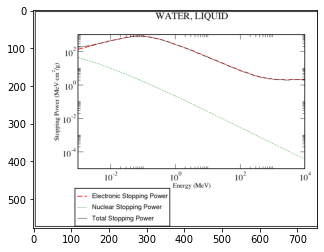

In [11]:
img_eau = mpimg.imread('stopping power liquid water.png')
img_os = mpimg.imread('stopping power os.png')
impglot2 = plt.imshow(img_os)
plt.show()
imgplot1 = plt.imshow(img_eau)
plt.show()

On remarque donc que le pouvoir d'arrêt électronique est pratiquement égal au pouvoir d'arrêt total tandisque que le pouvoir d'arrêt nucléaire est tout à fait négligeable entre des énergies de 3 MeV et 250 MeV. En exécutant la cellule de code ci-dessous, on peut donc voir les différentes courbes de pouvoir d'arrêt de l'eau liquide comme celle fournies plus haut mais affichant seulement les énergies entre 3 MeV et 250 MeV.

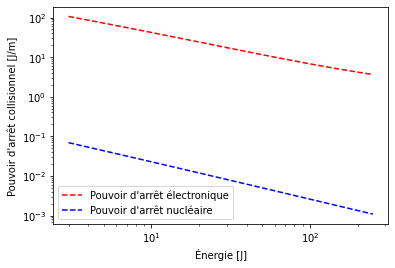

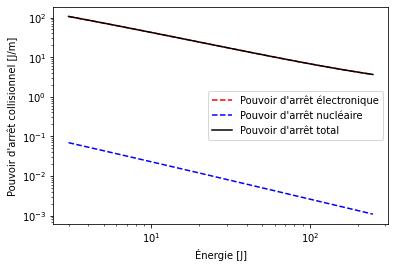

In [12]:
file2 = open('question 2.csv')
energy2, electron2, nuclear2, total2 = [], [], [], []
for x in file2:
    y = x.split('|')
    energy2.append(float(y[0]))
    electron2.append(float(y[1]))
    nuclear2.append(float(y[2]))
    total2.append(float(y[3]))
plt.plot(energy2, electron2, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
plt.plot(energy2, nuclear2, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
#plt.plot(energy, total, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
plt.xlabel('''Énergie [J]''')
plt.show()
plt.plot(energy2, electron2, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
plt.plot(energy2, nuclear2, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
plt.plot(energy2, total2, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
plt.xlabel('''Énergie [J]''')
plt.show()

On peut également justifier la considération seule des intéractions du proton avec les électrons en calculant le pourcentage d'écart moyen du pouvoir d'arrêt électronique et nucléaire par rapport au pouvoir d'arrêt total. En exécutant la cellule ci-dessous on obtient ce pourcentage d'écart moyen pour l'eau.

In [13]:
pourc_écart_electronique = []
pourc_écart_nuclear = []
for x, y in zip(electron2, total2):
    pourc_écart_electronique.append((abs(x-y)/y)*100)
pourc_écart_electronique_moy = sum(pourc_écart_electronique)/len(pourc_écart_electronique)
print('''Le pourcentage d'écart moyen du pouvoir d'arrêt électronique est de '''+str(pourc_écart_electronique_moy)+'''% par rapport au pouvoir d'arrêt total.''')
for x, y in zip(nuclear2, total2):
    pourc_écart_nuclear.append((abs(x-y)/y)*100)
pourc_écart_nuclear_moy = sum(pourc_écart_nuclear)/len(pourc_écart_nuclear)
print('''Le pourcentage d'écart moyen du pouvoir d'arrêt nucléaire est de '''+str(pourc_écart_nuclear_moy)+'''% par rapport au pouvoir d'arrêt total.''')

Le pourcentage d'écart moyen du pouvoir d'arrêt électronique est de 0.045417604749260355% par rapport au pouvoir d'arrêt total.
Le pourcentage d'écart moyen du pouvoir d'arrêt nucléaire est de 99.95249740533399% par rapport au pouvoir d'arrêt total.


**Question 3**

On intègre l'inverse du pouvoir d'arrêt pour déterminer la portée car plus le pouvoir d'arrêt est élevé pour une même énergie initiale, moins le proton pourra parcourir de distance. La portée et le pouvoir d'arrêt sont donc inversement proportionnel.

**Question 4**

Nous savons que le pouvoir d'arrêt est donné par la formule suivante:
\begin{gather*}
    S_{col}(T)=2\pi r_e^2m_ec^2n_e\frac{1}{\beta^2}\left[\ln(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2})-2\beta^2\right]
\end{gather*}
Ayant les définitions suivantes dans l'énoncer:
\begin{align*}
    T_e^{max}=&\frac{a(\gamma^2-1)}{b+\delta\gamma} & a=&2m_ec^2 & b=&1+(\frac{m_e}{m_p})^2\\
    \delta=&2\frac{m_e}{m_p} & U=&2\pi r_e^2m_ec^2n_e & k=&\frac{a^2}{I^2},\\
\end{align*}
nous pouvons les utiliser afin de réduire l'expression du pouvoir d'arrêt. Nous avons donc:
\begin{gather*}
    S_{col}(T)=\frac{U}{\beta^2}\left[\ln(\frac{a^2\beta^2\gamma^2(\gamma^2-1)}{I^2(b+\delta\gamma)})-2\beta^2\right]\\
    S_{col}(T)=\frac{U}{\beta^2}\left[\ln(\frac{k\beta^2\gamma^2(\gamma^2-1)}{b+\delta\gamma})-2\beta^2\right]\\
\end{gather*}
Nous avons également l'expression suivante mettant en relation $\gamma$ et $\beta$, ce qui nous permettra d'avoir $S_{col}$ seulement en fonction de $\gamma$:
\begin{gather*}
    \gamma^2\beta^2=(\gamma^2-1)\implies \beta^2=\frac{\gamma^2-1}{\gamma^2}
\end{gather*}
En substituant cette relation dans $S_{col}$, on obtient:
\begin{gather*}
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\left[\ln(\frac{k\gamma^2(\gamma^2-1)^2}{\gamma^2(b+\delta\gamma)})-\frac{2(\gamma^2-1)}{\gamma^2}\right]\\
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\left[\ln(\frac{k(\gamma^2-1)^2}{b+\delta\gamma})-\frac{2(\gamma^2-1)}{\gamma^2}\right]\\
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\\
\end{gather*}

Il faut donc intégrer l'inverse de cette expression en fonction de $T$ pour obtenir la portée des protons. Considérant que la variable $T$ se cache dans l'expression de $\gamma$ on peut affirmer que l'inverse de cette expression n'est pas intégrable de manière analytique. Une méthode approximative d'intégration numérique est donc nécessaire pour évaluer cette intégrale.

**Question 5**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code de la question 5.

In [14]:
import time

Les fonctions *f_eau* et *f_os* dans la cellule de code ci-dessous prennent en argument l'énergie initiale du proton et retourne la fonction à intégrer pour obtenir la portée dans les deux milieux soit:

$$\frac{\rho}{S_{col}}$$

In [15]:
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os

Et les fonctions *trap_eau* et *trap_os* dans la cellule de code ci-dessous servent à évaluer l'approximation de l'intégrale qui fournit la portée:
$$R_{CSDA}=\int_0^{T_i}\frac{\rho}{S_{col}}dT^{'}$$

avec la méthode des trapèzes. Ces fonction prennent donc en argument les nombre de tranches (trapèzes) que l'on veut utiliser pour évaluer l'intégrale et elles retournent la portée en $[Kg/m^2]$ du proton de (150MeV dans la situation de l'énoncé) dans le milieu d'intérêt.


In [16]:
T_i = 150*1.602e-13
def trap_eau(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def trap_os(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)

La cellule ci-dessous quant à elle, contient les fonction *romberg_eau* et *romberg_os* qui permettent d'évaluer l'intégrale de la portée du proton dans les milieux d'intérêts avec la méthode de Romberg. Ces fonctions prennent en argument les dimensions de la matrice de Romberg, dont les premiers éléments de chaque rangée sont l'estimation de l'intégrale avec la méthode des trapèzes pour un nombre de tranches étant une puissance de 2 égale à l'indice de la rangée, et retournent cette même matrice de Romberg. La valeur la plus précise pour chaque matrice de Romberg calculée se trouve à être la dernière valeur de la dernière rangé.

In [17]:
def romberg_eau(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R

def romberg_os(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R


Il peut donc être intéressant de comparer les résultats obtenues avec les deux méthodes d'intégration numérique pour un même nombre de tranche. Dans notre cas nous comparerons les résultats avec 8 tranches ($2^3$).


In [18]:
print('''La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode de Romberg avec 8 tranches est de '''+str(romberg_eau(4)[-1][-1])+'''[Kg/m^2].''')
print('''La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode des trapèzes avec 8 tranches est de '''+str(trap_eau(8))+'''[Kg/m^2].''')

La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode de Romberg avec 8 tranches est de 157.03622166738904[Kg/m^2].
La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode des trapèzes avec 8 tranches est de 156.71481041894438[Kg/m^2].


On remarque donc que les valeurs ne sont pas tout à fait les mêmes malgré qu'elles soient similaires. Cela peut s'expliquer par l'erreur d'approximation de chacune de ces méthodes qui n'est pas la même. Nous allons donc ici nous interresser à la précision de chacune de ces méthodes en estimant le nombre de tranches nécessaires pour atteindre un erreur d'approximation égale à la précision machine. La cellule de code ci-dessous rapporte donc le nombre de tranches nécessaires pour obtenir une erreur d'approximation $ch_i^2=\frac{1}{3}(I_{i}-I_{i-1})$ inférieur ou égale à 2.2e-16, qui est la précision machine pour 64 bits, avec la méthode des trapèzes. Cet algorithme itère donc sur la méthode des trapèzes en rajoutant des tranches jusqu'à ce que l'erreur d'approximation calculée soit inférieure ou égale à 2.2e-16.

In [ ]:

tranches_trap_eau = 2
tranches_trap_os = 2
while True is True:
    I_ii = trap_eau(tranches_trap_eau*2)
    I_i = trap_eau(tranches_trap_eau)
    eps = (1/3)*(I_ii-I_i)
    tranches_trap_eau *= 2
    print(eps, tranches_trap_eau)
    if abs(eps) < 2.2e-16:
       print('''Le nombre de tranches eau est de '''+ str(2*(tranches_trap_eau-1)))
       print(trap_eau((tranches_trap_eau-1)*2))
       print(trap_eau(4355))
       break
while True is True:
    I_ii = trap_os(tranches_trap_os*2)
    I_i = trap_os(tranches_trap_os)
    eps = (1/3)*(I_ii-I_i)
    tranches_trap_os *= 2
    print(eps, tranches_trap_os)
    if abs(eps) < 2.2e-16:
       print('''Le nombre de tranches os est de '''+ str(2*(tranches_trap_os-1)))
       break

On remarque donc qu'avec la méthode des trapèzes, l'atteinte de la précision machine est ridiculement longue. Il faudrait de nombreuses heures avec un ordinateur protable pour atteindre la précision machine avec cette méthode d'intégration numérique.

Dans la cellule de code ci-dessous, on rapporte le nombre de tranches nécessaires à la méthode de Romberg pour atteindre la précision machine à l'aide de la formule de l'erreur d'approximation suivante:
$$c_mh_i^{2m}=\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})$$
L'algorithme itère donc sur la méthode de Romberg en ajoutant $2^{i}$ tranches à chaque itération jusqu'à ce que l'erreur calculée soit inférieur ou égale à 2.2e-16. Aussi à noter que l'erreur est calculée sur l'avant dernier élément de la dernière rangée de la matrice de Romberg puisque la formule pour calculer l'erreur nous limite à cette valeur.

In [ ]:
tranches_romberg_eau = 3
tranches_romberg_os = 3
while True is True:
    end = False
    start = time.time()
    n = tranches_romberg_eau
    tranches_romberg_eau += 1
    R = romberg_eau(n)
    i = R[n-1]
    eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
    print(eps, n)
    if abs(eps) < 2.2e-16:
        end1 = time.time()
        print('''Le nombre de tranche avec romberg est '''+str(2**(tranches_romberg_eau-1)))
        # print(end1 - start)
        end = True
    if end:
        break

while True is True:
    end = False
    start = time.time()
    n = tranches_romberg_os
    tranches_romberg_os += 1
    R = romberg_os(n)
    i = R[n-1]
    eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
    print(eps, n)
    if abs(eps) < 2.2e-16:
        end = time.time()
        print('''Le nombre de tranche avec romberg est '''+str(2**(tranches_romberg_os-1)))
        # print(end - start)
        end = True
    if end:
        break

Il ne faut donc environ que 2048 tranches avec la méthode de Romberg pour atteindre la précision machine et cela se calcul en moin d'une seconde ce qui est très rapide. La métode de Romberg est donc plus utile pour atteindre une grande précision rapidement que la méthode des trapèzes.

**Question 6**

Dans les cellules de code ci-dessous, on produit des listes contenant la portée, l'erreur sur la portée ainsi que le nombre de tranches utilisées pour calculer cette portée pour chacun des milieux d'intérêts ainsi que pour chacune des méthodes d'intégration numérique. On utilise ensuite ces listes pour produire deux graphiques, l'un pour l'eau liquide et un pour l'os solide, dans lequel les courbes de la portée et de l'erreur en fonction du nombre de tranches sont tracées.

Création des listes pour la méthode des trapèzes.

In [ ]:
tranches_eau = 2
tranches_os = 2
nb_échantillons = []
portée_trap_eau = []
erreur_trap_eau = []
portée_romb_eau = []
erreur_romb_eau = []

portée_trap_os  = []
erreur_trap_os = []
portée_romb_os  = []
erreur_romb_os = []
for x in range(25):
    I_ii = trap_eau(tranches_eau*2)
    I_i = trap_eau(tranches_eau)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_eau.append(abs(eps))
    print(eps)
    print(tranches_eau)
    nb_échantillons.append(tranches_eau)
    tranches_eau *= 2
    portée_trap_eau.append(I_ii)

for x in range(25):
    I_ii = trap_os(tranches_os*2)
    I_i = trap_os(tranches_os)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_os.append(abs(eps))
    print(eps)
    print(tranches_os)
    tranches_os *= 2
    portée_trap_os.append(I_ii)

Création des listes pour la méthode de Romberg

In [ ]:
for x in range(1,26):
    R = romberg_eau(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    print(eps)
    portée_romb_eau.append(i[x-2])
    erreur_romb_eau.append(abs(eps))

for x in range(1,26):
    R = romberg_os(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    print(eps)
    portée_romb_os.append(i[x-2])
    erreur_romb_os.append(abs(eps))

Création des figures contenant les courbes de portée et d'erreur en fonction du nombre d'échantillons (tranches).

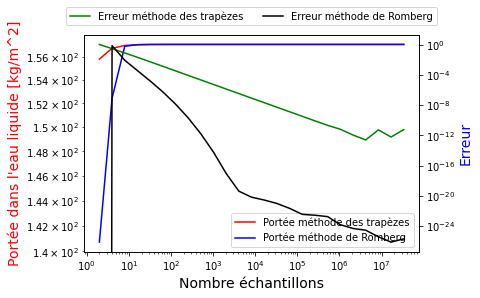

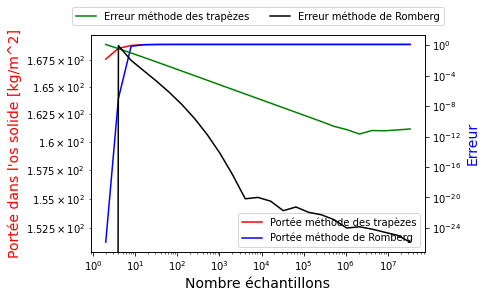

In [22]:
'''Figure pour l'eau'''
fig,ax = plt.subplots()
ax.plot(nb_échantillons, portée_trap_eau, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_eau, color="blue", label = '''Portée méthode de Romberg''')
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Portée dans l'eau liquide [kg/m^2]",color="red",fontsize=14)
plt.legend()

ax2=ax.twinx()
ax2.plot(nb_échantillons, erreur_trap_eau,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_eau,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

''''Figure pour l'os'''
fig,ax = plt.subplots()
ax.plot(nb_échantillons, portée_trap_os, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_os, color="blue", label = '''Portée méthode de Romberg''')
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Portée dans l'os solide [kg/m^2]",color="red",fontsize=14)
plt.legend()

ax2=ax.twinx()
ax2.plot(nb_échantillons, erreur_trap_os,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_os,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()


On voit donc que l'erreur sur la portée avec la méthode des trapèzes semble osciller après une certaine précision ce qui explique le temps extrêmement long pour atteindre la précision machine.

**Question 7**

Pour obtenir l'erreur sur la portée à l'ordre le plus grand, il nous faut utiliser la formule suivante:
$$\epsilon=\frac{1}{12}h^2[f^{'}(a)-f^{'}(b)]$$

Pour ce faire toutefois, il nous faut trouver l'expression analytique de la dérivée de la fonction que l'on veut intégrer, soit l'inverse du pouvoir d'arrêt.

En utilisant le pouvoir d'arrêt seulement en fonction de $\gamma$ obtenu à la question 4 et en sachant que $\gamma$ est seulement en fonction de $T$, nous pouvons calculer la dérivée du pouvoir d'arrêt à l'aide du théorème de dérivation des fonctions composées ainsi:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}T}=\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}
\end{gather*}
Commençons donc par calculer la dérivée de $S_{col}$ par rapport à $\gamma$.
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\frac{\text{d}}{\text{d}\gamma}\left[\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\right]
\end{gather*}
En effectuant une dérivée de produit:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\frac{\text{d}}{\text{d}\gamma}\left(\frac{U\gamma^2}{\gamma^2-1}\right)\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]
\end{gather*}
Le premier terme est une dérivation de quotient, ce qui nous donne:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}= -\frac{U(2\gamma(\gamma^2-1)-\gamma^2(2\gamma))}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{U(2\gamma^3-2\gamma-2\gamma^3)}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
\end{gather*}
Pour le deuxième terme, on effectue également la dérivation:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\left[\frac{b+\delta\gamma}{k(\gamma^2-1)^2}\right]\frac{\text{d}}{\text{d}\gamma}\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\left[\frac{b+\delta\gamma}{k(\gamma^2-1)^2}\right]\left(\frac{4k\gamma(\gamma^2-1)(b+\delta\gamma)-\delta k(\gamma^2-1)^2}{(b+\delta\gamma)^2}\right)\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]
\end{gather*}

Et puisque la dérivée de $\gamma$ est la suivante:
$$\frac{\text{d}\gamma}{\text{dT}}=\frac{1}{m_pc^2}$$

On peut exprimer $\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}$:
$$\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}=\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]\frac{1}{m_pc^2}=\frac{\text{d}S_{col}}{\text{d}T}$$
La fonction a intégrer étant $\frac{\rho}{S_{col}}$, on peut donc exprimer la dérivée première de cette expression comme:
$$\frac{-S_{col}^{'}\rho}{S_{col}^2}=\frac{\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]\frac{\rho}{m_pc^2}}{\left[\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\right]^2}$$

Nous avons donc implanter une fonction nommée *deri_fonction* dans la cellule ci-dessous qui prend en argument l'énergie du proton en joules et une string contenant le nom du milieu de propagation: 'eau' ou 'os'. Si le deuxième arguement donnée à cette fonction est autre chose que l'une des deux string énoncé précédemment, la fonction retourne le message 'mauvaise entrée'.

In [24]:
def deri_fonction(T, substance):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    Énergie_moyenne_excitation_eau = 75*1.602e-19
    Énergie_moyenne_excitation_os = 91.9*1.602e-19
    rho_eau = 997
    rho_os = 1850
    eau = [(1, 0.111894), (8, 0.888106)]
    densité_électronique_eau = densité_électronique(eau, 997)
    os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
    densité_électronique_os = densité_électronique(os, 1850)
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau*(10**3)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau*1.60218e-19)**2))-2*(Beta**2))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os*(10**3)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os*1.60218e-19)**2))-2*(Beta**2))
    U_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os*(10**3))
    U_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau*(10**3))
    k_eau = a**2/Énergie_moyenne_excitation_eau
    k_os = a**2/Énergie_moyenne_excitation_os
    S_col_prime_eau = (1/(m_p*(c**2)))*(((-2*U_eau*gamma)/(((gamma**2)-1)**2))*(np.log((k_eau*(gamma**2-1)**2)/(b+delta*gamma)))+((U_eau*(gamma**2)*((3*delta*(gamma**4))+(4*b*(gamma**3))-(2*delta*(gamma**2))-(4*b*gamma)-delta))/((((gamma**2)-1)**3)*(delta*gamma-b))))
    S_col_prime_os = (1/(m_p*(c**2)))*(((-2*U_os*gamma)/(((gamma**2)-1)**2))*(np.log((k_os*(gamma**2-1)**2)/(b+delta*gamma)))+((U_os*(gamma**2)*((3*delta*(gamma**4))+(4*b*(gamma**3))-(2*delta*(gamma**2))-(4*b*gamma)-delta))/((((gamma**2)-1)**3)*(delta*gamma-b))))
    if substance == 'eau':
        return (-S_col_prime_eau*rho_eau/(S_col_eau**2))
    if substance == 'os':
        return (-S_col_prime_os*rho_os/(S_col_os**2))
    else:
        return('mauvaise entrée')


Grâce à cette fonction, il nous est désormais possible d'utiliser la formule suivante:
$$\epsilon=\frac{1}{12}h^2[f^{'}(a)-f^{'}(b)]$$

Pour trouver l'erreur sur la portée à l'ordre le plus grand d'un proton de 150MeV dans l'eau liquide et dans l'os solide. Ce donc ce que nous faisons dans la cellule de code suivante.


In [25]:
epsi_eau = (1/12)*(150*1.602e-13/(2**23))**2*(deri_fonction(3*1.602e-13,'eau')-deri_fonction(150*1.602e-13,'eau'))
epsi_os = (1/12)*(150*1.602e-13/(2**23))**2*(deri_fonction(3*1.602e-13,'os')-deri_fonction(150*1.602e-13,'os'))
print('''L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'eau liquide est de '''+str(abs(epsi_eau))+' [Kg/m^2]')
print('''L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'os solide est de '''+str(abs(epsi_os))+' [Kg/m^2]')

L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'eau liquide est de 1.2435544603191413e-17 [Kg/m^2]
L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'os solide est de 1.320856636979791e-17 [Kg/m^2]


**Question 8**

Nous allons donc présenté dans les tableaux ci-dessous les portées évaluées à l'aide de la méthode des trapèzes et la méthode de Romberg ainsi que les erreurs d'approximation pratique de celles-ci et l'erreur d'approximation obtenue analytiquement pour la méthode des trapèzes. 

Voici donc le tableau pour la méthode des trapèzes:

In [137]:
from prettytable import PrettyTable


myTable = PrettyTable(["Milieu de propagation", "Portée calculée", "Erreur analytique", "Erreur évaluée pratiquement"]) 
  
myTable.add_row(["", "[Kg/m^2]", "[Kg/m^2]", "[Kg/m^2]"]) 
myTable.add_row(["Eau liquide", str(trap_eau(2**11)), "1.2435544603191413e-17", "5.587054971556427e-06"])
myTable.add_row(["Os solide", str(trap_os(2**11)), "1.320856636979791e-17", "6.090800610536462e-06"]) 
  
print(myTable)

+-----------------------+--------------------+------------------------+-----------------------------+
| Milieu de propagation |  Portée calculée   |   Erreur analytique    | Erreur évaluée pratiquement |
+-----------------------+--------------------+------------------------+-----------------------------+
|                       |      [Kg/m^2]      |        [Kg/m^2]        |           [Kg/m^2]          |
|      Eau liquide      | 157.05608391088066 | 1.2435544603191413e-17 |    5.587054971556427e-06    |
|       Os solide       | 168.9620402962407  | 1.320856636979791e-17  |    6.090800610536462e-06    |
+-----------------------+--------------------+------------------------+-----------------------------+


Et voici le tableau pour la méthode de Romberg:

In [142]:
from prettytable import PrettyTable


myTable = PrettyTable(["Milieu de propagation", "Portée calculée", "Erreur analytique", "Erreur évaluée pratiquement"]) 
  
myTable.add_row(["", "[Kg/m^2]", "[Kg/m^2]", "[Kg/m^2]"]) 
myTable.add_row(["Eau liquide", str(romberg_eau(11)[-1][-2]), "--", "3.710685474117072e-17"])
myTable.add_row(["Os solide", str(romberg_os(11)[-1][-2]), "--", "3.911263067312589e-17"]) 
  
print(myTable)

+-----------------------+--------------------+-------------------+-----------------------------+
| Milieu de propagation |  Portée calculée   | Erreur analytique | Erreur évaluée pratiquement |
+-----------------------+--------------------+-------------------+-----------------------------+
|                       |      [Kg/m^2]      |      [Kg/m^2]     |           [Kg/m^2]          |
|      Eau liquide      | 157.05608949800686 |         --        |    3.710685474117072e-17    |
|       Os solide       | 168.96204638712035 |         --        |    3.911263067312589e-17    |
+-----------------------+--------------------+-------------------+-----------------------------+


Pour la production de chacun des résultats ci-haut, nous avons utilisé 2048 tranches. On remarque donc que la portée calculée avec la méthode de Romberg et celle calculée à l'aide de la méthode des trapèzes sont pratiquement identique et pour atteindre ces résultats le temps de calcul était dans l'ordre des secondes ce qui est souhaitable. Toutefois, l'erreur sur la portée évaluée pratiquement avec la méthode des trapèzes est beaucoup plus haute que celle calculée avec la méthode de Romberg. En ce qui concerne l'erreur analytique de la méthode des trapèzes par contre, on obtient une erreur environ équivalente au tier de l'erreur pratique de la méthode de Romberg. Si la forme dérivée de la fonction que l'on souhaite intégré est facilement obtenable, il peut donc être souhaitable d'obtenir une plus grande précision pour un même nombre de tranches avec l'erreur analytique de la méthode des trapèzes que l'erreur pratique de Romberg mais dans notre cas, obtenir la forme analytique de la dérivée de notre fonction était plus long que de simplement augmentée le nombre de tranches de la méthode de Romberg. Nous croyons donc que la méthode de Romberg est plus pratique pour obtenir une grande précision rapidement sur la portée que la méthode des trapèzes.

**Question 9**

La cellule de code contient les modules nécessaire à l'exécution du code de la question 9.

In [146]:
from scipy.stats import moyal
from scipy.stats import skew

On génère donc la cellule ci-dessous une variable nommée *moy* qui correspond à la distribution Moyal de l'énergie de 10000 protons en eV.

In [144]:
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)

Et dans la cellule suivante, on trace la distribution de l'énergie de ces 10000 protons sous la forme d'un histogramme.

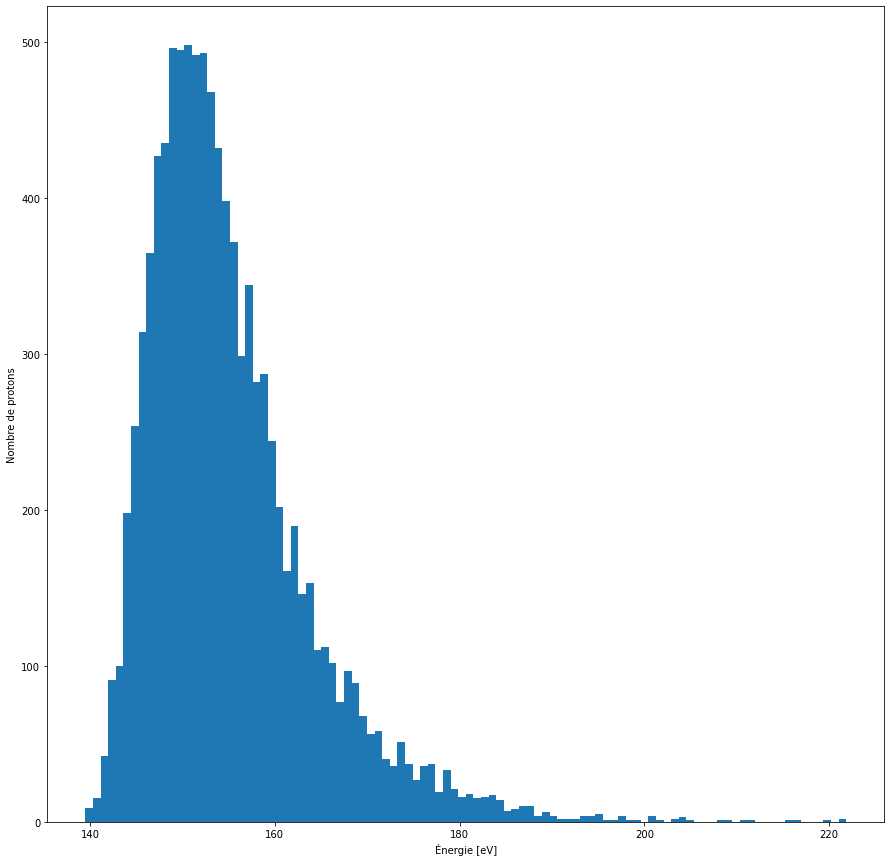

L'asymétrie de la distribution d'énergies de Moyal est de 1.595331393971772.


In [200]:
plt.figure(figsize = (15, 15))
plt.hist((np.array(moy)), bins = 100) 
plt.xlabel('Énergie [eV]')
plt.ylabel('Nombre de protons')
plt.show()
a = skew(moy)
print('''L'asymétrie de la distribution d'énergies de Moyal est de '''+str(a)+'.')

Comme on peut le voir dans l'histogramme ci-dessus, la distribution de Moyal n'est pas tout à fait symétrique. Nous avons en effet mesuré une asymétrie de la distribution de données de 1.595331393971772 ce qui indique une présence plus importante de proton ayant une énergie supérieure à la valeur centrale de 150 MeV.

**Question 10**

La cellule de code suivante contient les modules nécessaire à l'exécution du code de la question 10.

In [150]:
import timeit

Dans les cellules suivantes, nous calculerons le temps nécessaire au calcul de la portée des 10000 protons, dont l'énergie en eV correspond à la distribution Moyal, à l'aide du module *timeit* pour la méthode des trapèzes la méthode de Romberg et à l'aide de *scipy.integrate.quad*. Pour chacun des calculs de portée à l'aide des trapèzes et de la méthode de Romberg, on s'assure que l'erreur d'approximation soit égale ou supérieure à 1.49e-8 soit le précision par défaut de *scipy.integrate.quad*. 

Pour ce qui est de la méthode des trapèzes, pour atteindre la précision de base de la fonction *scipy.integrate.quad*, il faut $2^{17}$ tranches. Calculer la portée de 10000 protons avec ce nombre de tranches est très long. Dans la cellule ci-dessous, on calcule donc la portée de seulement 10 protons et on mesure le temps nécessaire pour faire ce calcule. Réduire le nombre de portées calculées augmente l'incertitude sur le nombre de protons que l'on peut mesurer par seconde mais nous permet d'avoir un estimé raisonnable sans avoir à attendre plusieurs heures.

In [175]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def trap_eau(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def romberg_eau(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(trap_eau(2**17,x*1.602e-13))
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'eau liquide avec les trapèzes''')

Nous pouvons donc calculer la portée de 1.0361627428695253 protons par seconde dans l'eau liquide avec les trapèzes


In [177]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
def trap_os(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)
def romberg_os(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(trap_os(2**17,x*1.602e-13))
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'os solide avec la méthode des trapèzes''')

Nous pouvons donc calculer la portée de 1.036249016482992 protons par seconde dans l'os solide avec la méthode des trapèzes


Dans les deux cellules de code suivantes, on mesure le temps nécessaire pour calculer la portée de 10000 protons dont les énergies correspondent à la distribution Moyal avec 256 tranches. Ce nombre de tranches est suffisant pour atteindre la précision de la fonction *scipy.integrate.quad* avec la méthode de Romberg. On peut ensuite déterminer le nombre de protons dont on peut calculer la portée par seconde à l'aide de cette algorithme.

In [174]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def trap_eau(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def romberg_eau(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(romberg_eau(8,x*1.602e-13))
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10000/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'eau liquide avec la méthode de Romberg''')

Nous pouvons donc calculer la portée de 495.73988409273295 protons par seconde dans l'eau liquide avec la méthode de Romberg


In [159]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
def trap_os(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)
def romberg_os(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_romb = []
for x in moy:
    portée_romb.append(romberg_os(8,x*1.602e-13)[-1][-2])
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10000/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'os solide avec la méthode de Romberg''')

Nous pouvons donc calculer la portée de 405.06946706418825 protons par seconde dans l'os solide avec la méthode de Romberg


Et finalement, dans les deux cellules de codes suivantes, on calcule la portée de 10000 protons dont les énergies correspondent à la distribution Moyal à l'aide de la fonction *scipy.integrate.quad* et on affiche le nombre de protons dont on peut calculer la portée par seconde.

In [160]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
from scipy import integrate
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_quad = []
for x in moy:
    portée_quad.append((integrate.quad(f_eau, 3*1.602e-13, x*1.602e-13))[0])
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10000/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'eau liquide avec la fonction scipy.integrate.quad''')

Nous pouvons donc calculer la portée de 1176.291017032531 protons par seconde dans l'eau liquide avec la fonction scipy.integrate.quad


In [161]:
mysetup = '''from scipy.stats import moyal
moy = moyal(loc = 150, scale = 4).rvs(size = 10000)
import numpy as np
from scipy import integrate
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
'''
 
# code snippet whose execution time is to be measured
mycode = '''
portée_quad = []
for x in moy:
    portée_quad.append((integrate.quad(f_os, 3*1.602e-13, x*1.602e-13))[0])
'''
 
# timeit statement
print ('''Nous pouvons donc calculer la portée de '''+ str(10000/(timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1)))+''' protons par seconde dans l'os solide avec la fonction scipy.integrate.quad''')

Nous pouvons donc calculer la portée de 1327.490921886949 protons par seconde dans l'os solide avec la fonction scipy.integrate.quad


**Question 11**

La cellule de code suivante contient les modules nécessaire à l'exécution du code de la question 11.

In [181]:
from scipy import integrate

On produit ici les listes nécessaires au tracé des histrogrammes des portées des protons calculées à partir de la distribution Moyal avec la méthode de Romberg. Pour ce faire, on utilise des variantes des fonctions *trap_eau*, *trap_os*, *romberg_eau* et *romberg_os* dans lesquels on peut donner en argument le nombre de tranches que l'on veut utiliser pour calculer la portée ainsi que l'énergie initiale du proton en joules. Le nombre de tranches utilisées pour calculée la portée avec la méthode de Romberg est de 2048, nombre de tranches nécessaires pour atteindre une erreur au moins aussi précise que l'erreur par défaut de la fonction *scipy.integrate.quad*. Pour ce qui est du calcul de portée avec la méthode des trapèzes nous avons réduit considérablement le nombre de tranches par rapport au nombre nécessaire pour atteindre la précision d'erreur de *scipy.integrate.quad*. En effet pour atteindre cette précision le temps de calcul de portée pour un proton est d'environ 1.03s comme calculé au problème précédent. Il faudrait donc environ 10300s pour produire un seul histogramme soit 171 minutes et 40 secondes ou 2 heures et 52 minutes. Nous avons donc réduit le nombre de tranches pour le calcul à 128  malgré le fait que la précision du calcul de ces portée ne sera pas équivalent à celui des autres méthodes.

In [185]:
def trap_eau_t(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def trap_os_t(N, E):
    a = 3*1.602e-13
    b = E
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)
'''Romberg eau'''
def romberg_eau_t(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau_t(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R
'''Romberg os'''
def romberg_os_t(t, E):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os_t(2**x, E)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R

portée_romb_eau = []
for x in moy:
    portée_romb_eau.append(romberg_eau_t(8,x*1.602e-13)[-1][-2])
portée_romb_os = []
for x in moy:
    portée_romb_os.append(romberg_os_t(8,x*1.602e-13)[-1][-2])
portée_romb_eau_red = []
for x in moy[:100]:
    portée_romb_eau_red.append(romberg_eau_t(8,x*1.602e-13)[-1][-2])
portée_romb_os_red = []
for x in moy[:100]:
    portée_romb_os_red.append(romberg_os_t(8,x*1.602e-13)[-1][-2])



In [197]:
portée_trap_eau = []
for x in moy:
    portée_trap_eau.append(trap_eau_t(128,x*1.602e-13))
portée_trap_os = []
for x in moy:
    portée_trap_os.append(trap_os_t(128,x*1.602e-13))
portée_trap_eau_red = []
for x in moy[:100]:
    portée_trap_eau_red.append(trap_eau_t(128,x*1.602e-13))
portée_trap_os_red = []
for x in moy[:100]:
    portée_trap_os_red.append(trap_os_t(128,x*1.602e-13))

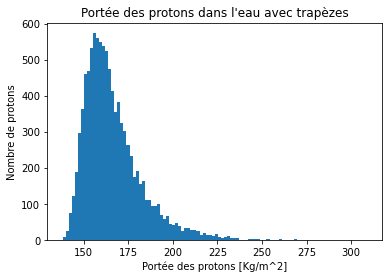

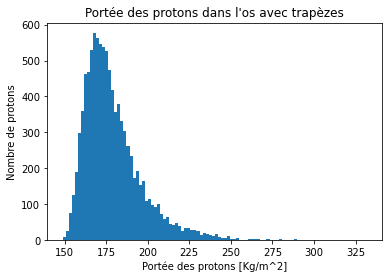

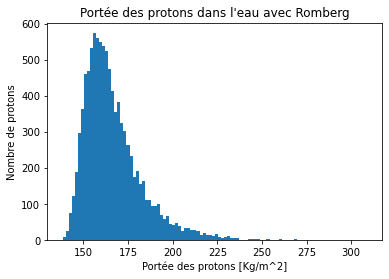

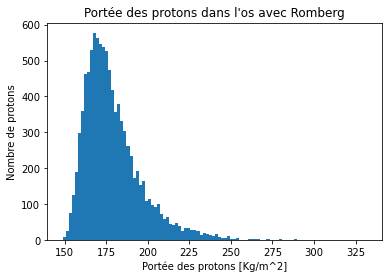

In [204]:
plt.hist(np.array(portée_trap_eau), bins=100)
plt.title('''Portée des protons dans l'eau avec trapèzes''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_trap_os), bins=100)
plt.title('''Portée des protons dans l'os avec trapèzes''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_romb_eau), bins=100)
plt.title('''Portée des protons dans l'eau avec Romberg''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_romb_os), bins=100)
plt.title('''Portée des protons dans l'os avec Romberg''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()


Dans les cellules ci-dessous, on produit les listes contenant les portées des 10000 protons dont les énergies proviennent de la distribution Moyal, à l'aide de la fonction *scipy.integrate.quad*. On utilise ensuite ces liste pour produire les histogrammes affichant les portées calculées dans les deux milieux.

In [187]:
portée_quad_eau = []
for x in moy:
    portée_quad_eau.append((integrate.quad(f_eau, 3*1.602e-13, x*1.602e-13))[0])
portée_quad_os = []
for x in moy:
    portée_quad_os.append((integrate.quad(f_os, 3*1.602e-13, x*1.602e-13))[0])
portée_quad_os_red = []
for x in moy[:100]:
    portée_quad_os_red.append((integrate.quad(f_os, 3*1.602e-13, x*1.602e-13))[0])
portée_quad_eau_red = []
for x in moy[:100]:
    portée_quad_eau_red.append((integrate.quad(f_eau, 3*1.602e-13, x*1.602e-13))[0])

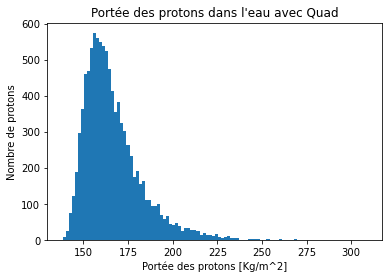

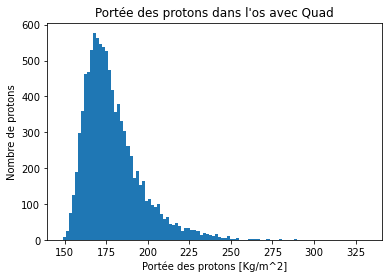

In [203]:
plt.hist(np.array(portée_quad_eau), bins=100)
plt.title('''Portée des protons dans l'eau avec Quad''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_quad_os), bins=100)
plt.title('''Portée des protons dans l'os avec Quad''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.show()


Dans la cellule suivante, on retrace les mêmes histogrammes que précédement mais en ne calculant la portée que de 100 protons.

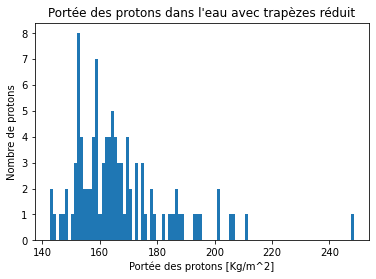

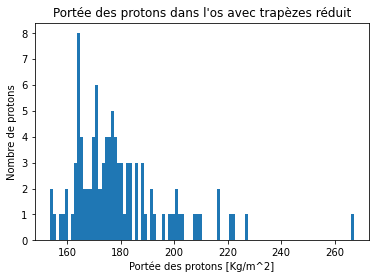

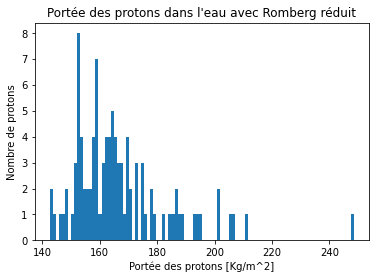

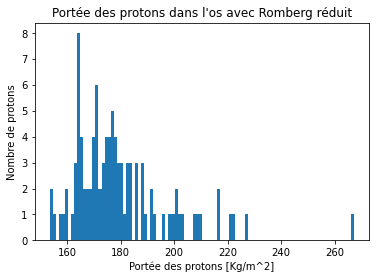

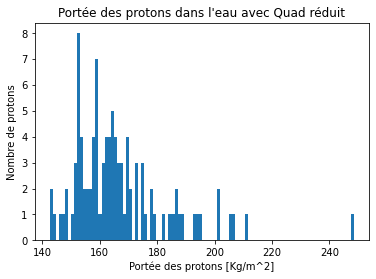

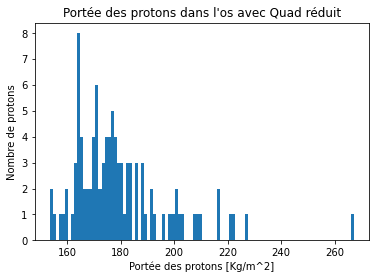

In [205]:
plt.hist(np.array(portée_trap_eau_red), bins=100)
plt.title('''Portée des protons dans l'eau avec trapèzes réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_trap_os_red), bins=100)
plt.title('''Portée des protons dans l'os avec trapèzes réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_romb_eau_red), bins=100)
plt.title('''Portée des protons dans l'eau avec Romberg réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_romb_os_red), bins=100)
plt.title('''Portée des protons dans l'os avec Romberg réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_quad_eau_red), bins=100)
plt.title('''Portée des protons dans l'eau avec Quad réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()
plt.hist(np.array(portée_quad_os_red), bins=100)
plt.title('''Portée des protons dans l'os avec Quad réduit''')
plt.xlabel('Portée des protons [Kg/m^2]')
plt.ylabel('Nombre de protons')
plt.show()

On remarque donc que la distribution des portées est beaucoup plus éparse lorsqu'on réduit le nombre de protons étudiés. On peut donc en conclure que plus le nombre de protons est grand, plus la distribution des portées prend la même forme que la distribution Moyal.

**Question 12**

Pour pouvoir illustrer le transport des protons dans les deux milieux d'intérêts, il nous faut pouvoir produire une courbe du dépot énergétique du proton en fonction de la distance parcouru. En d'autre mot, il nous faut trouvé l'énergie perdue par le proton à chaque incrément de distances arbitraire. Pour ce faire, puisque la valeur de *S_col* rapporte une quantité d'énergie par distance, on peut obtenir le dépot énergtique du proton après avoir parcouru une certaine distance en multipliant *S_col* avec cette même distance. On utlisera donc des variantes des fonctions *f_eau* et *f_os*, nommées *f_eau_12* et *f_os_12*, qui prennent les mêmes argument que les fonction originales mais qui retournent plutôt la valeur de *S_col*. En ayant la valeur de l'énergie déposé à chaque tranche par le proton, on peut ensuite tracé une courbe de ce dépot en fonction de la distance totale parcourue.

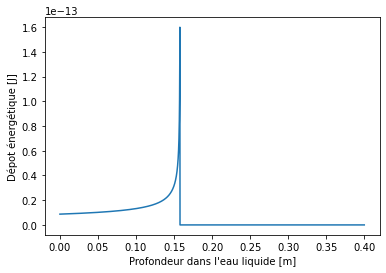

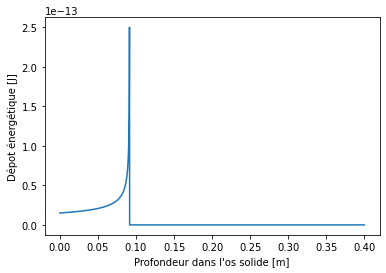

In [231]:
def f_eau_12(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return S_col_eau
def f_os_12(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    # print(type(T))
    return S_col_os
s = 0.0001
profondeur_eau = []
depot_eau = [0]
profondeur_os = []
depot_os = [0]
for x in range(4000):
    if sum(depot_eau) >= 147*1.602e-13:
        depot_eau.append(0)
        # print(s*x)
    else:
        depot_eau.append((f_eau_12((150*1.602e-13)-sum(depot_eau)))*s)
    profondeur_eau.append(s*x)
# print(depot)
plt.plot(profondeur_eau, depot_eau[1:])
plt.xlabel("Profondeur dans l'eau liquide [m]")
plt.ylabel('Dépot énergétique [J]')
plt.show()


for x in range(4000):
    if sum(depot_os) >= 147*1.602e-13:
        depot_os.append(0)
        # print(s*x)
    else:
        depot_os.append((f_os_12((150*1.602e-13)-sum(depot_os)))*s)
    profondeur_os.append(s*x)
# print(depot)
plt.plot(profondeur_os, depot_os[1:])
plt.xlabel("Profondeur dans l'os solide [m]")
plt.ylabel('Dépot énergétique [J]')
plt.show()

On remarque donc que l'endroit où le proton dépose la plus grande quantité d'énergie, et où il la perd toute, est très près de l'endroit prédit par le calcul de la portée en fonction du milieu effectué dans les problèmes précédents pour un proton d'énergie initiale de 150 MeV. En effet, jusqu'à maintant, les portées nus calculions avaient les unitée suivantes $[Kg/m^2]$. Ces unités ne sont clairement pas des unités de distance. Cela s'explique par le fait que la portée que l'on calcule avec l'intégrale founis dans l'énoncé du projet ($R_{CSDA}=\int_0^{T_i}\frac{\rho}{S_{col}}dT^{'}$) est normalisée par la masse volumique du milieu. Il nous faut donc diviser cette portée calculée avec l'intégrale par la masse volumique du milieu d'intérêt pour obtenir une portée en unité de distance. C'est donc ce que l'on va faire dans la cellule de code suivante en prenant la valeur de la méthode de Romberg qui donne une erreur légérement inférieur à la précision machine ($2^{11}$ tranches).

In [226]:
print('''La portée d'un proton de 150 MeV dans l'eau liqude calculée avec la méthode de Romberg est de '''+str((romberg_eau(11)[-1][-2])/rho_eau)+' m')
print('''La portée d'un proton de 150 MeV dans l'os solide calculée avec la méthode de Romberg est de '''+str((romberg_os(11)[-1][-2])/rho_os)+' m')

La portée d'un proton de 150 MeV dans l'eau liqude calculée avec la méthode de Romberg est de 0.1575286755245806 m
La portée d'un proton de 150 MeV dans l'os solide calculée avec la méthode de Romberg est de 0.09133083588492992 m


Si l'on compare ces valeurs avec l'endroit où le proton perd toute son énergie dans les graphiques précédents, on remarque qu'elles sont pratiquement égales. En effet, dans l'eau liquide le proton perd toute son énergie à une distance de 0.1577 m et dans l'os solide à une distance de 0.0915 m selon les deux graphiques ci-dessus. On peut donc calculer le pourcentage d'erreur entre ces deux valeurs pour les deux milieux.

In [229]:
pourc_121 = abs(((romberg_eau(11)[-1][-2])/rho_eau)-0.1577)/0.1577
pourc_122 = abs(((romberg_os(11)[-1][-2])/rho_os)-0.0915)/0.0915
print('''Le pourcentage d'écart entre la valeur de portée calculée avec la méthode de Romberg et celle obtenue sur la graphique du dépot énergétique en fonction de la profondeur pour l'eau liquide est donc de '''+str(pourc_121)+' %')
print('''Le pourcentage d'écart entre la valeur de portée calculée avec la méthode de Romberg et celle obtenue sur la graphique du dépot énergétique en fonction de la profondeur pour l'os solide est donc de '''+str(pourc_122)+' %')

Le pourcentage d'écart entre la valeur de portée calculée avec la méthode de Romberg et celle obtenue sur la graphique du dépot énergétique en fonction de la profondeur pour l'eau liquide est donc de 0.0010863948980304296 %
Le pourcentage d'écart entre la valeur de portée calculée avec la méthode de Romberg et celle obtenue sur la graphique du dépot énergétique en fonction de la profondeur pour l'os solide est donc de 0.0018487881428423814 %


Le pourcentage d'écart entre les deux valeurs de portée, et ce dans les deux milieux, est largement inférieur à 1%. On peut donc affirmer que la portée que nous avions calculée par intégration numérique est d'une précision plus que souhaitable. Il est aussi important de noter que la position du pic, nommé pic de Bragg, dépend de l'énergie intiale du proton étudié. Plus le proton est énergétique, plus le pic de Bragg sera décalé vers la droite donc plus il ira en profondeur dans le milieux.

**Question 13**

Le pic de Bragg montre que les protons vont traverser la matière pour déposer quasiment toute leur énergie à une profondeur donnée, puis s’arrêter net. Ceci est une grande intérêt pour la radiothérapie puisque cela permet une grande précision lors du transfert d'énergie aux tumeurs, sans pour autant dommager les tissus environnant.

**Question 14**

Oui, il est nécessaire de calculer les portées jusqu'à la précision machine pusique l'intensité énergétique transmise par les protons est directement fonction de la portée de ces derniers. On cherche le plus de précision possible lors de l'administration du soin puisqu'on veut détruire les cellules tumorales en gardant les cellules avoisinantes le plus sainement possible donc plus la précision de la porté est importante, plus le traitement sera adéquat.

**Question 15**

Tout d'abord, les photons n'ont pas un dépôt d'énergie strictement localisé. Il y a de la dispersion latérale le long du parcours ainsi qu'une forte dispersion avant et après le maximum de dépôt d'énergie. Ceci n'est pas adéquat pour le traitement d'un mélanome oculaire puisqu'un forte précision est requise pour ne pas causer de sequelle au patient, puisque le mélanome est a proximité d'organes sensibles. Les protons possèdent ce qui a été reproché ici aux photons, soit une précision importante, ce qui l'en fait la méthode idéale pour traiter un mélanome oculaire le plus idéalement possible.

**Question 16**

Bien que l'approximation que les protons vont essentiellement en ligne droite est relativement valable et aide à simplifier les calculs, cette approche n'est pas tout a fait réaliste. En effet, cette approche néglige les intéractions électriques, ce qui n'est pas rigoureux considérant que les protons du faisceau que l'on envoie ont une charge et les noyaux et électrons constituant les molécules d'os et d'eau ont également une charge. Cela signifie que le faisceau sera repoussé par les noyaux puisqu'ils ont une charge positives et sera attiré par les électrons en raison de leur charge négative. Ainsi, il serait intéressant d'ajouter à notre modèle l'influence des intéractions électriques sur la trajectoire du faisceau de proton et également prendre en considération les collisions entre les protons du faisceau et les noyaux atomiques, ce qui peut changer drastiquement la trajectoire de certain protons.